In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

Load the dataset

In [23]:
dataset = loadmat("kMeans_data.mat")

In [3]:
X = dataset['X']

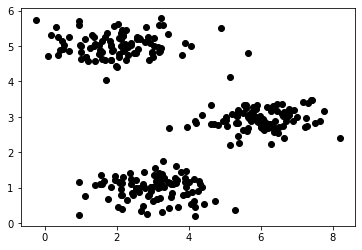

In [4]:
plt.scatter(X[:,0],X[:,1],c="black",marker="o")
plt.show()

In [5]:
def Initialize_params(X):
    #number of centroids
    k = 3
    m = X.shape[0]
    n = X.shape[1]
    
    return k,m,n

In [6]:
k,m,n = Initialize_params(X)

print("The number of cluster centroids:",k)
print("Number of training examples:",m)
print("Number of features:",n)

The number of cluster centroids: 3
Number of training examples: 300
Number of features: 2


In [7]:
n_iter = 10000

In [8]:
def Initialize_Centroids(X,m,k):
    centroids = []
    
    for i in range(k):
        index = np.random.randint(0,m - 1)
        centroids.append(X[index])
        
    return (np.array(centroids))

In [9]:
centroids = Initialize_Centroids(X,m,k)

print("The initial list of centroids are:","\n",centroids)

The initial list of centroids are: 
 [[2.84734459 0.26759253]
 [7.28780324 2.75179885]
 [1.65456309 1.18631175]]


In [10]:
def findClosestCentroid(X,centroids,m):
    input_centroid_map = np.zeros(m)
    
    for i in range(m):
        J = np.sqrt(np.sum(np.square(X[i] - centroids),axis = 1))
        input_centroid_map[i] = np.argmin(J)
    
    return input_centroid_map

In [11]:
input_centroid_map = findClosestCentroid(X,centroids,m)

print("The centroid of the first three examples:",input_centroid_map[:3])

The centroid of the first three examples: [2. 1. 1.]


In [12]:
def Recompute_Centroid(X,input_centroid_map,k,n):
    c = np.zeros((k,n))
    
    for i in range(k):
        c[i] = np.mean(X[input_centroid_map == i],axis = 0)
    
    return c

In [13]:
Computed_centroid = Recompute_Centroid(X,input_centroid_map,k,n)

print("Recomputed Centroid:","\n",Computed_centroid)

Recomputed Centroid: 
 [[3.43160441 1.02743661]
 [6.00748373 3.06107085]
 [1.90819565 4.18861179]]


In [14]:
def K_means(X,k,n_iter,input_centroid_map,Computed_centroid):
    
    _,m,n = Initialize_params(X)
    centroids = Initialize_Centroids(X,m,k)
    Computed_centroid = centroids
    for i in range(n_iter):
        
        input_centroid_map = findClosestCentroid(X,Computed_centroid,m)
        
        Computed_centroid = Recompute_Centroid(X,input_centroid_map,k,n)
        
    return input_centroid_map,Computed_centroid

In [15]:
k=3
input_centroid_map,Computed_centroid = K_means(X,k,n_iter,input_centroid_map,Computed_centroid)

In [16]:
colors = ['cyan','red','orange','yellow','magenta','brown','pink','blue']
labels = ['Cluster '+ str(i+1) for i in range(8)]

In [17]:
def plot_fn(X,k,input_centroid_map,colors,labels,Computed_centroid):
    for i in range(k):
        var = X[input_centroid_map == i]
        plt.scatter(var[:,0],var[:,1],color=colors[i],label=labels[i],marker='o')

    plt.scatter(Computed_centroid[:,0],Computed_centroid[:,1],color='black',label="Centroids",marker='x')
    plt.legend()
    plt.show()

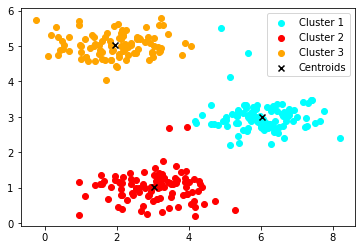

In [18]:
plot_fn(X,k,input_centroid_map,colors,labels,Computed_centroid)

## Elbow Method

Lets run from 3 to 8 clusters to find the optimal clusters

In [19]:
def Cost(X,centroids,centroid_map):
    J = 0
    for i in range(len(centroid_map)):
        J += np.sum(np.square(X[i] - centroids[int(centroid_map[i])]))
    return (J/len(centroid_map))

In [20]:
def elbow_method(X,n_iter,input_centroid_map,Computed_centroid):
    no_of_clusters = [3+i for i in range(6)]
    J =[]
    print("--------------------------------------------------")
    for i in range(len(no_of_clusters)):
        
        input_centroid_map,Computed_centroid = K_means(X,no_of_clusters[i],n_iter,input_centroid_map,Computed_centroid)
        print("Plot for " + str(no_of_clusters[i]) + " clusters:","\n")
        plot_fn(X,no_of_clusters[i],input_centroid_map,colors,labels,Computed_centroid)
        print("--------------------------------------------------")
        J.append(Cost(X,Computed_centroid,input_centroid_map))
    
    return J,no_of_clusters

--------------------------------------------------
Plot for 3 clusters: 



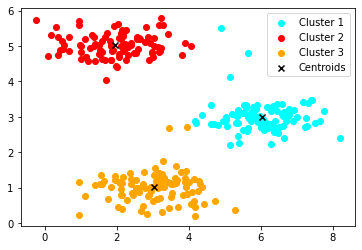

--------------------------------------------------
Plot for 4 clusters: 



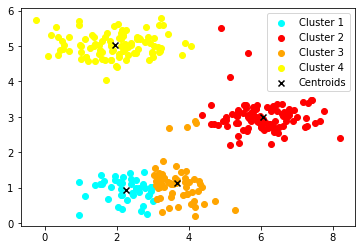

--------------------------------------------------
Plot for 5 clusters: 



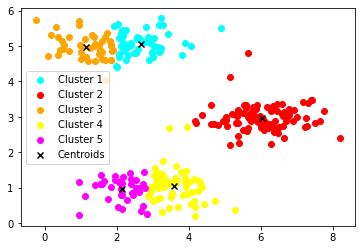

--------------------------------------------------
Plot for 6 clusters: 



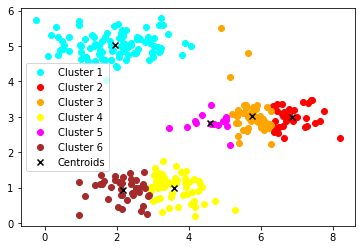

--------------------------------------------------
Plot for 7 clusters: 



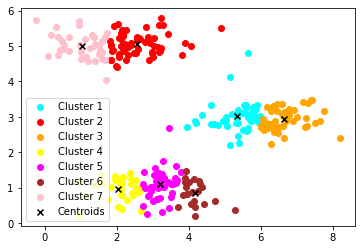

--------------------------------------------------
Plot for 8 clusters: 



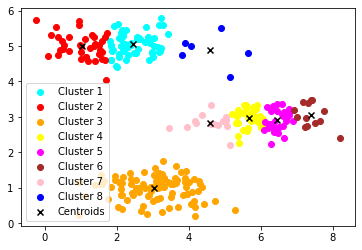

--------------------------------------------------


In [21]:
J, no_of_clusters = elbow_method(X,n_iter,input_centroid_map,Computed_centroid)

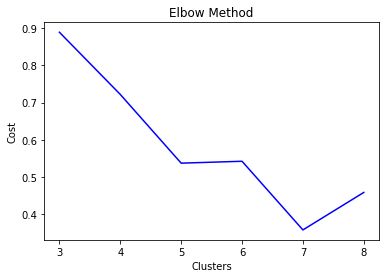

In [22]:
plt.plot(no_of_clusters,J,color="blue")
plt.xlabel("Clusters")
plt.ylabel("Cost")
plt.title("Elbow Method")
plt.show()

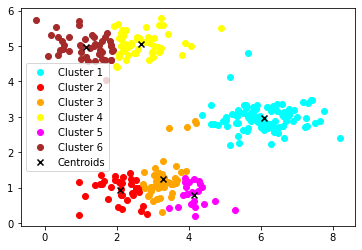

In [23]:
k=6
input_centroid_map,Computed_centroid = K_means(X,k,n_iter,input_centroid_map,Computed_centroid)
plot_fn(X,k,input_centroid_map,colors,labels,Computed_centroid)

## Inbuilt function for Elbow Method

In [24]:
from sklearn.cluster import KMeans
Cost = []
for i in range(3, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    Cost.append(kmeans.inertia_)


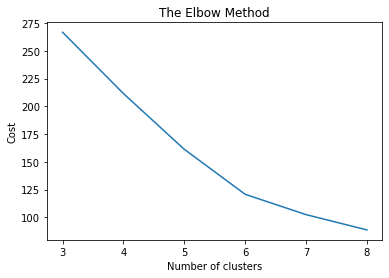

In [25]:
plt.plot(range(3, 9), Cost)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

seems k = 6 optimal number of cluster for the given data.

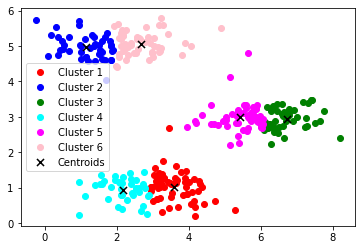

In [26]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2',marker = 'o')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3',marker = 'o')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 4',marker = 'o')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 5',marker = 'o')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], c = 'pink', label = 'Cluster 6',marker = 'o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 50 ,c = 'black', label = 'Centroids',marker = 'x')

plt.legend()
plt.show()

## Image Compression using Kmeans

Read the image file

In [27]:
import cv2

img  = cv2.imread("bird_small.png")

This is a 3D image, of shape 128*128*3

In [28]:
img.shape

(128, 128, 3)

Plot the image

In [29]:
cv2.imshow("Original Bird", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Each value varies from 0-255. To bring the data within same range, divide by 255(all values will be now between 0-1).

Convert 3D array to 2D array. 

In [30]:
img = img/255
X1 = img.reshape(-1, 3)
img.shape,X1.shape

((128, 128, 3), (16384, 3))

Create 16 centroids (Reducing to 16 color image)

In [31]:
k=16
n_iter = 10
input_centroid_map,Computed_centroid = K_means(X1,k,n_iter,input_centroid_map,Computed_centroid)

In [32]:
Computed_centroid.shape, input_centroid_map.shape

((16, 3), (16384,))

In [33]:
X_recovered = Computed_centroid[input_centroid_map.astype(int), :].reshape(img.shape)

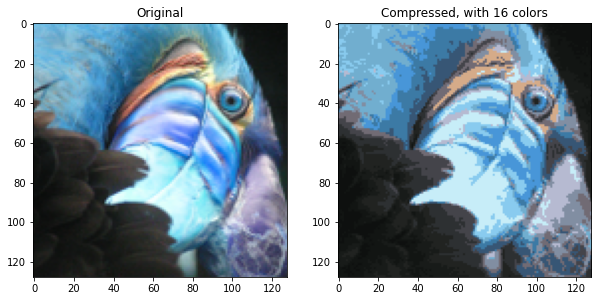

In [47]:
# Display the original image, rescale back by 255
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow((img*255).astype(np.uint8))
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow((X_recovered*255).astype(np.uint8))
ax[1].set_title('Compressed, with %d colors' % k)
ax[1].grid(False)